In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import statistics
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import MaxPool2D
from keras.layers.convolutional import Conv2D
from sklearn.model_selection import KFold

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#paths
path_meta="/content/drive/MyDrive/Hardware_Trojan/hw2vec/examples/metadata.tsv"
path_vectors="/content/drive/MyDrive/Hardware_Trojan/hw2vec/examples/vectors.tsv"

In [5]:
d={}
d["RS232-T900"]=1
d["PIC16F84-T100"]=1
d["RC6"]=0
d["syncRAM"]=0
d["RS232-T200"]=1
d["PIC16F84-T200"]=1
d["RS232-T600"]=1
d["RS232-T700"]=1
d["RS232-T400"]=1
d["RS232-T800"]=1
d["det_1011"]=0
d["spi_master"]=0
d["RS232-T100"]=1
d["RS232"]=0
d["RS232-T300"]=1
d["xtea"]=0
d["vga"]=0
d["PIC16F84"]=0
d["PIC16F84-T300"]=1
d["RS232-T500"]=1
d["PIC16F84-T400"]=1
d["RS232-T901"]=1
d["RC5"]=0

In [6]:
df1=pd.read_csv(path_meta,header=None, sep="\t")

In [7]:
df1.head()

,0
0,RS232-T800
1,PIC16F84
2,PIC16F84-T400
3,RS232
4,vga


In [8]:
df1.shape

(23, 1)

In [9]:
df2=pd.read_csv(path_vectors,header=None, sep="\t")

In [10]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.062122,0.0,0.0,0.0,0.073054,0.0,0.0,0.0,0.0,0.0,...,0.270453,0.0,0.0,0.291998,0.0,0.0,1.194398,0.0,0.0,0.0
1,0.062122,0.0,0.0,0.0,0.073054,0.0,0.0,0.0,0.0,0.0,...,0.270453,0.0,0.0,0.291998,0.0,0.0,1.194398,0.0,0.0,0.0
2,0.062122,0.0,0.0,0.0,0.073054,0.0,0.0,0.0,0.0,0.0,...,0.270453,0.0,0.0,0.291998,0.0,0.0,1.194398,0.0,0.0,0.0
3,0.062122,0.0,0.0,0.0,0.073054,0.0,0.0,0.0,0.0,0.0,...,0.270453,0.0,0.0,0.291998,0.0,0.0,1.194398,0.0,0.0,0.0
4,0.062122,0.0,0.0,0.0,0.073054,0.0,0.0,0.0,0.0,0.0,...,0.270453,0.0,0.0,0.291998,0.0,0.0,1.194398,0.0,0.0,0.0


In [11]:
DFGEmbeddings=df2.to_numpy()

In [12]:
DFGEmbeddings

array([[0.06212181, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06212181, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06212181, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06212181, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06212181, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06212181, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
DFGtargets=[]
for i in df1[0].to_list():
  DFGtargets.append(d[i])

In [14]:
DFGtargets

[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]

In [15]:
#paths
path_meta="/content/drive/MyDrive/Hardware_Trojan/hw2vec/AST3/metadata.tsv"
path_vectors="/content/drive/MyDrive/Hardware_Trojan/hw2vec/AST3/vectors.tsv"

In [16]:
df1=pd.read_csv(path_meta,header=None, sep="\t")

In [17]:
df1.head()

,0
0,RS232-T500
1,PIC16F84-T400
2,spi_master
3,PIC16F84-T100
4,det_1011


In [18]:
df1.shape

(23, 1)

In [19]:
df2=pd.read_csv(path_vectors,header=None, sep="\t")

In [20]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.066100,0.108321,0.036359,0.037367,0.0,0.046660,0.0,0.045483,0.0,...,0.07387,0.0,0.017694,0.000000,0.042765,0.0,0.0,0.060330,0.013082,0.036439
1,0.005831,0.238237,0.213228,0.145096,0.230753,0.0,0.063717,0.0,0.143097,0.0,...,0.07387,0.0,0.207471,0.150919,0.065670,0.0,0.0,0.123288,0.018613,0.075878
2,0.000000,0.066100,0.108321,0.036359,0.037367,0.0,0.046660,0.0,0.045483,0.0,...,0.07387,0.0,0.017694,0.000000,0.042765,0.0,0.0,0.060330,0.013082,0.036439
3,0.005831,0.238237,0.213228,0.145096,0.230753,0.0,0.063717,0.0,0.143097,0.0,...,0.07387,0.0,0.207471,0.150919,0.065670,0.0,0.0,0.123288,0.018613,0.075878
4,0.000000,0.066100,0.108321,0.036359,0.037367,0.0,0.046660,0.0,0.045483,0.0,...,0.07387,0.0,0.017694,0.000000,0.042765,0.0,0.0,0.060330,0.013082,0.036439


In [21]:
ASTEmbeddings=df2.to_numpy()

In [22]:
ASTEmbeddings

array([[ 0.        ,  0.06610035,  0.10832112, ...,  0.06032965,
         0.01308193,  0.03643883],
       [ 0.00583081,  0.23823659,  0.21322812, ...,  0.12328789,
         0.0186134 ,  0.07587808],
       [ 0.        ,  0.06610035,  0.10832112, ...,  0.06032965,
         0.01308193,  0.03643883],
       ...,
       [-0.01218344, -0.00801564, -0.        , ..., -0.02085542,
        -0.01366941, -0.02029413],
       [ 0.        ,  0.06610035,  0.10832112, ...,  0.06032965,
         0.01308193,  0.03643883],
       [-0.01218344, -0.00801564, -0.        , ..., -0.02085542,
        -0.01366941, -0.02029413]])

In [23]:
ASTtargets=[]
for i in df1[0].to_list():
  ASTtargets.append(d[i])

In [24]:
ASTtargets

[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]

In [25]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

In [26]:
def compute_roc_auc(index,clf,X,Y):
    y_predict = clf.predict_proba([X[i] for i in index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve([Y[i] for i in index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 1.0
Score for fold 1 : 0.8333333333333334
Score for fold 2 : 0.5
Score for fold 3 : 0.6
Accuracy:  0.7333333333333334


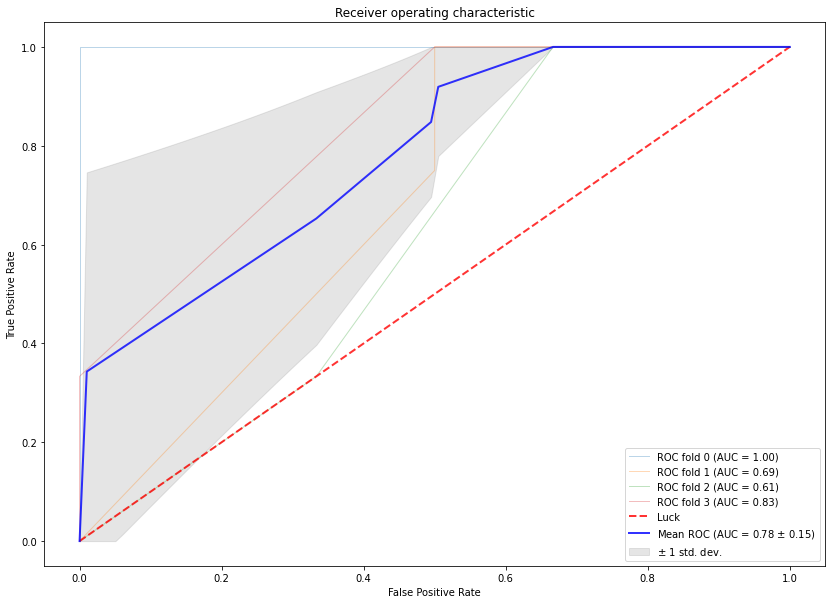

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f6d266d0>)

In [27]:
#rf ast
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(verbose=False,random_state=42)
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(ASTEmbeddings, ASTtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(ASTEmbeddings, ASTtargets):
    X_train, X_test = [ASTEmbeddings[i] for i in train_index] ,[ASTEmbeddings[i] for i in test_index]
    y_train, y_test = [ASTtargets[i] for i in train_index] ,[ASTtargets[i] for i in test_index]
    rf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,rf,ASTEmbeddings,ASTtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,rf,ASTEmbeddings,ASTtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=rf.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.8333333333333334
Score for fold 1 : 0.8333333333333334
Score for fold 2 : 0.8333333333333334
Score for fold 3 : 1.0
Accuracy:  0.875


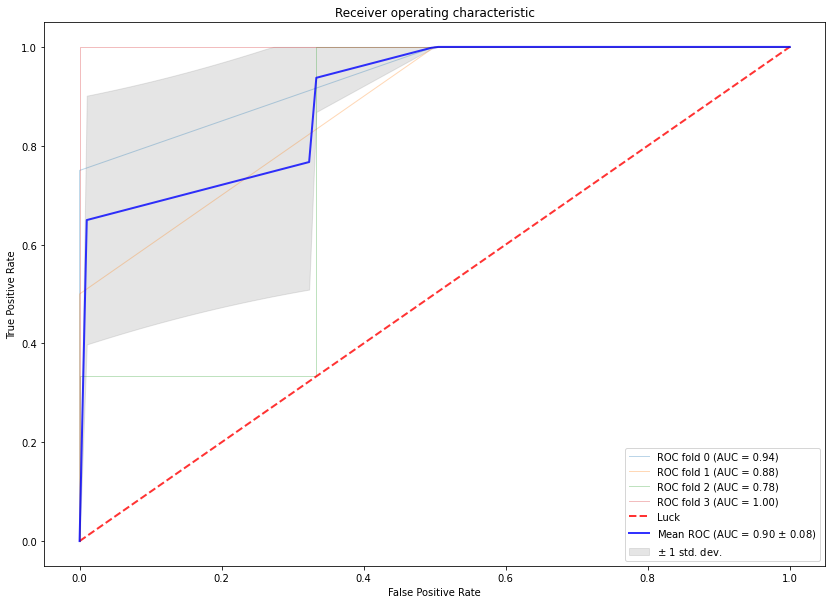

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f698fd90>)

In [28]:
#rf dfg
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(verbose=False,random_state=42)
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(DFGEmbeddings, DFGtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(DFGEmbeddings, DFGtargets):
    X_train, X_test = [DFGEmbeddings[i] for i in train_index] ,[DFGEmbeddings[i] for i in test_index]
    y_train, y_test = [DFGtargets[i] for i in train_index] ,[DFGtargets[i] for i in test_index]
    rf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,rf,DFGEmbeddings,DFGtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,rf,DFGEmbeddings,DFGtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=rf.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.8333333333333334
Score for fold 1 : 0.8333333333333334
Score for fold 2 : 0.5
Score for fold 3 : 0.6
Accuracy:  0.6916666666666667


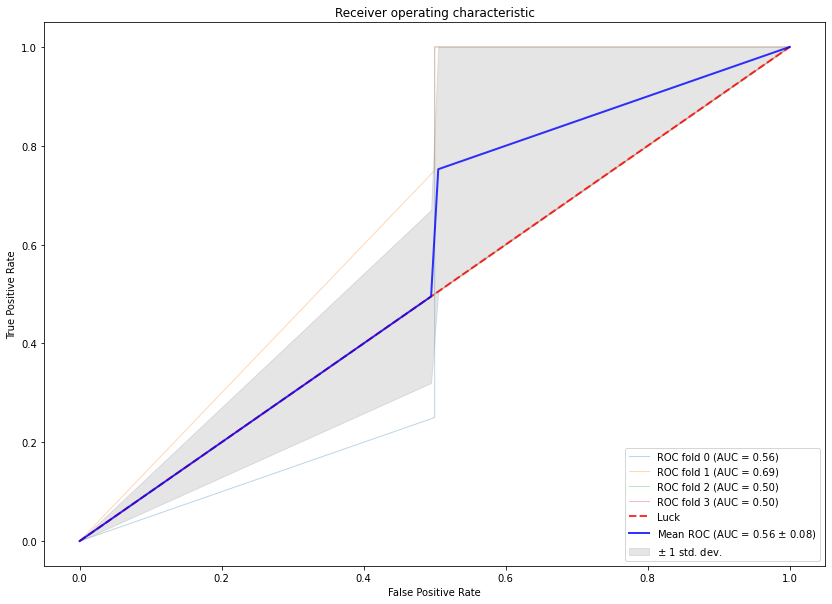

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f4bc77d0>)

In [29]:
#knn ast
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=5)
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(ASTEmbeddings, ASTtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(ASTEmbeddings, ASTtargets):
    X_train, X_test = [ASTEmbeddings[i] for i in train_index] ,[ASTEmbeddings[i] for i in test_index]
    y_train, y_test = [ASTtargets[i] for i in train_index] ,[ASTtargets[i] for i in test_index]
    neigh.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,neigh,ASTEmbeddings,ASTtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,neigh,ASTEmbeddings,ASTtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=neigh.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.5
Score for fold 1 : 0.8333333333333334
Score for fold 2 : 0.6666666666666666
Score for fold 3 : 0.8
Accuracy:  0.7


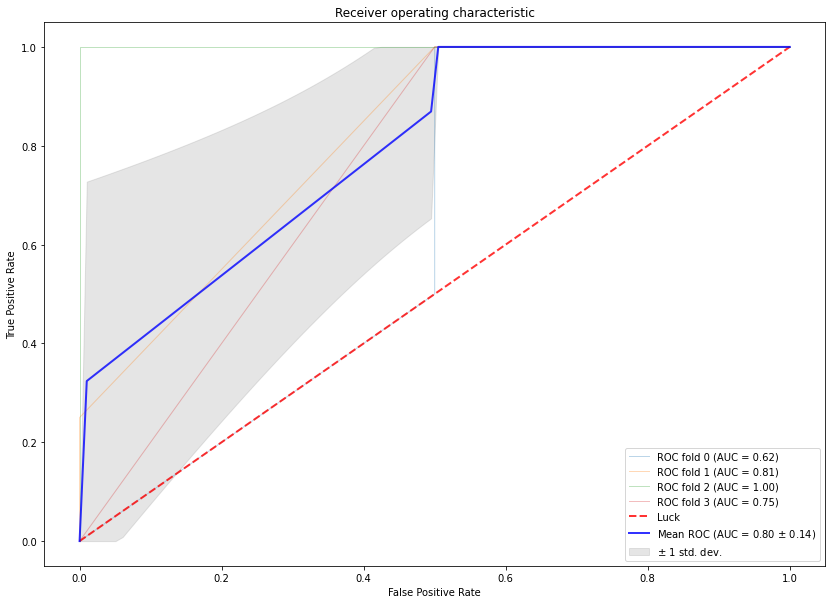

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f6d7d310>)

In [30]:
#knn dfg
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
neigh=KNeighborsClassifier(n_neighbors=5)
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(DFGEmbeddings, DFGtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(DFGEmbeddings, DFGtargets):
    X_train, X_test = [DFGEmbeddings[i] for i in train_index] ,[DFGEmbeddings[i] for i in test_index]
    y_train, y_test = [DFGtargets[i] for i in train_index] ,[DFGtargets[i] for i in test_index]
    neigh.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,neigh,DFGEmbeddings,DFGtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,neigh,DFGEmbeddings,DFGtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=neigh.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.8333333333333334
Score for fold 1 : 0.6666666666666666
Score for fold 2 : 0.6666666666666666
Score for fold 3 : 0.8
Accuracy:  0.7416666666666667


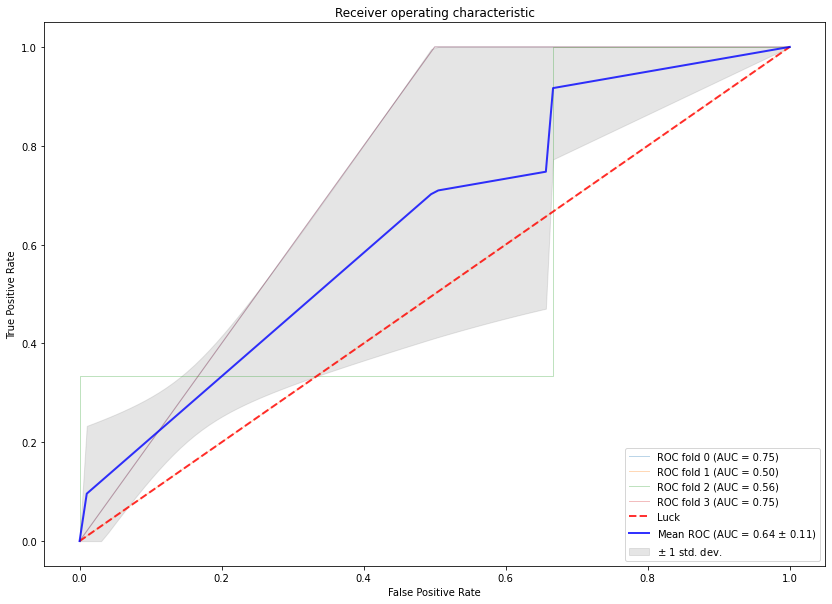

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f49e0ad0>)

In [31]:
#adaboost ast
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(ASTEmbeddings, ASTtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(ASTEmbeddings, ASTtargets):
    X_train, X_test = [ASTEmbeddings[i] for i in train_index] ,[ASTEmbeddings[i] for i in test_index]
    y_train, y_test = [ASTtargets[i] for i in train_index] ,[ASTtargets[i] for i in test_index]
    ada.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,ada,ASTEmbeddings,ASTtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,ada,ASTEmbeddings,ASTtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=ada.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.8333333333333334
Score for fold 1 : 0.6666666666666666
Score for fold 2 : 0.8333333333333334
Score for fold 3 : 0.8
Accuracy:  0.7833333333333333


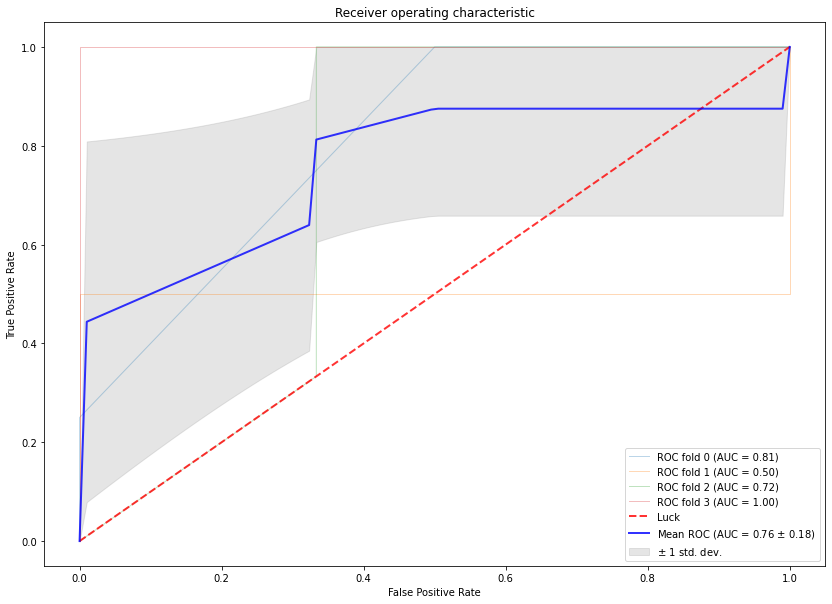

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f4933cd0>)

In [32]:
#adaboost dfg
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(DFGEmbeddings, DFGtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(DFGEmbeddings, DFGtargets):
    X_train, X_test = [DFGEmbeddings[i] for i in train_index] ,[DFGEmbeddings[i] for i in test_index]
    y_train, y_test = [DFGtargets[i] for i in train_index] ,[DFGtargets[i] for i in test_index]
    ada.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,ada,DFGEmbeddings,DFGtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,ada,DFGEmbeddings,DFGtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=ada.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.6666666666666666
Score for fold 1 : 0.8333333333333334
Score for fold 2 : 0.8333333333333334
Score for fold 3 : 0.6
Accuracy:  0.7333333333333334


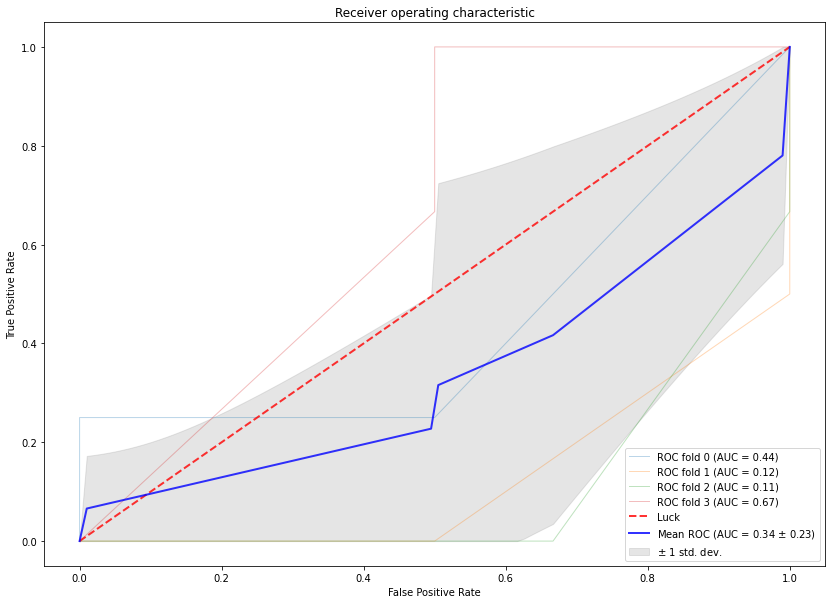

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f48a48d0>)

In [33]:
#SVM ast
from sklearn.svm import SVC
clf = SVC(probability=True)
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(ASTEmbeddings, ASTtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(ASTEmbeddings, ASTtargets):
    X_train, X_test = [ASTEmbeddings[i] for i in train_index] ,[ASTEmbeddings[i] for i in test_index]
    y_train, y_test = [ASTtargets[i] for i in train_index] ,[ASTtargets[i] for i in test_index]
    clf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,clf,ASTEmbeddings,ASTtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,clf,ASTEmbeddings,ASTtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=clf.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.6666666666666666
Score for fold 1 : 0.6666666666666666
Score for fold 2 : 0.5
Score for fold 3 : 0.6
Accuracy:  0.6083333333333333


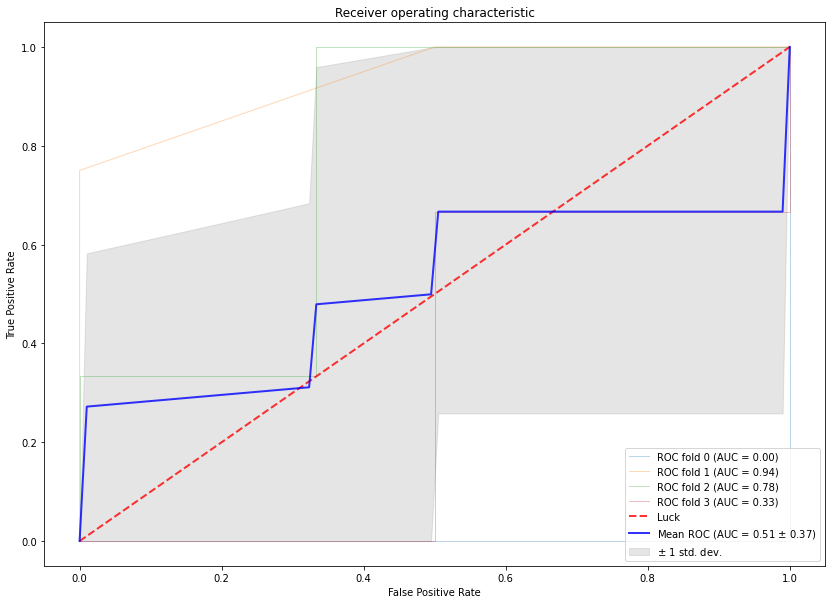

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f47c5190>)

In [34]:
#SVM DFG
from sklearn.svm import SVC
clf = SVC(probability=True)
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(DFGEmbeddings, DFGtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(DFGEmbeddings, DFGtargets):
    X_train, X_test = [DFGEmbeddings[i] for i in train_index] ,[DFGEmbeddings[i] for i in test_index]
    y_train, y_test = [DFGtargets[i] for i in train_index] ,[DFGtargets[i] for i in test_index]
    clf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,clf,DFGEmbeddings,DFGtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,clf,DFGEmbeddings,DFGtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=clf.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.6666666666666666
Score for fold 1 : 0.6666666666666666
Score for fold 2 : 0.6666666666666666
Score for fold 3 : 1.0
Accuracy:  0.75


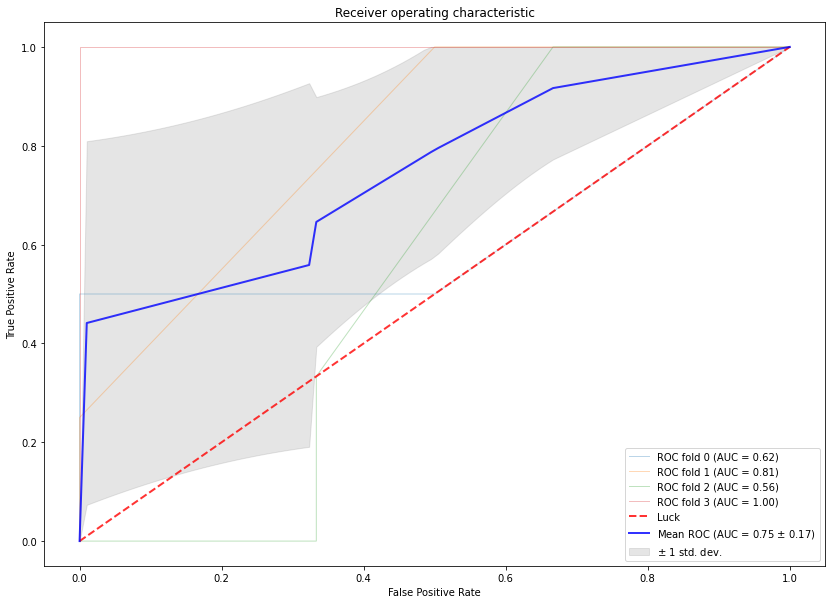

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f47042d0>)

In [35]:
#LR ast
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(ASTEmbeddings, ASTtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(ASTEmbeddings, ASTtargets):
    X_train, X_test = [ASTEmbeddings[i] for i in train_index] ,[ASTEmbeddings[i] for i in test_index]
    y_train, y_test = [ASTtargets[i] for i in train_index] ,[ASTtargets[i] for i in test_index]
    clf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,clf,ASTEmbeddings,ASTtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,clf,ASTEmbeddings,ASTtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=clf.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.6666666666666666
Score for fold 1 : 0.6666666666666666
Score for fold 2 : 0.5
Score for fold 3 : 0.6
Accuracy:  0.6083333333333333


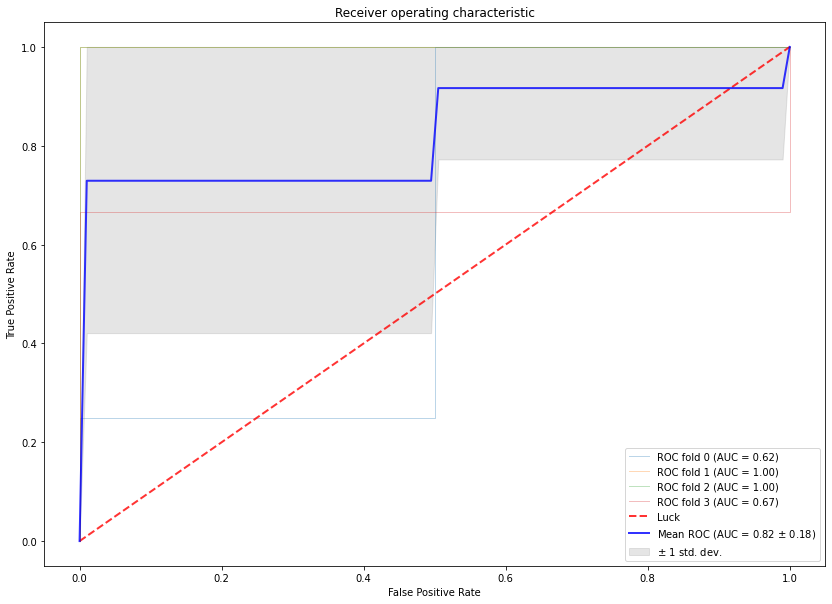

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f45e0090>)

In [36]:
#LR DFG
clf = LogisticRegression()
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(DFGEmbeddings, DFGtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(DFGEmbeddings, DFGtargets):
    X_train, X_test = [DFGEmbeddings[i] for i in train_index] ,[DFGEmbeddings[i] for i in test_index]
    y_train, y_test = [DFGtargets[i] for i in train_index] ,[DFGtargets[i] for i in test_index]
    clf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,clf,DFGEmbeddings,DFGtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,clf,DFGEmbeddings,DFGtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=clf.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.6666666666666666
Score for fold 1 : 0.8333333333333334
Score for fold 2 : 0.6666666666666666
Score for fold 3 : 1.0
Accuracy:  0.7916666666666666


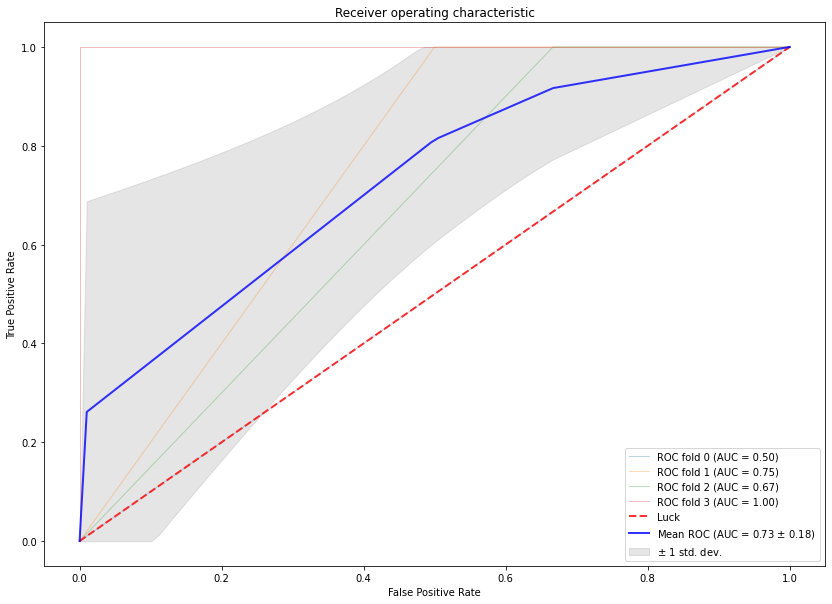

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f451a650>)

In [37]:
#Naive bayes ast
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
rf=BernoulliNB()
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(ASTEmbeddings, ASTtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(ASTEmbeddings, ASTtargets):
    X_train, X_test = [ASTEmbeddings[i] for i in train_index] ,[ASTEmbeddings[i] for i in test_index]
    y_train, y_test = [ASTtargets[i] for i in train_index] ,[ASTtargets[i] for i in test_index]
    rf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,rf,ASTEmbeddings,ASTtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,rf,ASTEmbeddings,ASTtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=rf.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)

StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
Score for fold 0 : 0.6666666666666666
Score for fold 1 : 0.6666666666666666
Score for fold 2 : 0.5
Score for fold 3 : 0.6
Accuracy:  0.6083333333333333


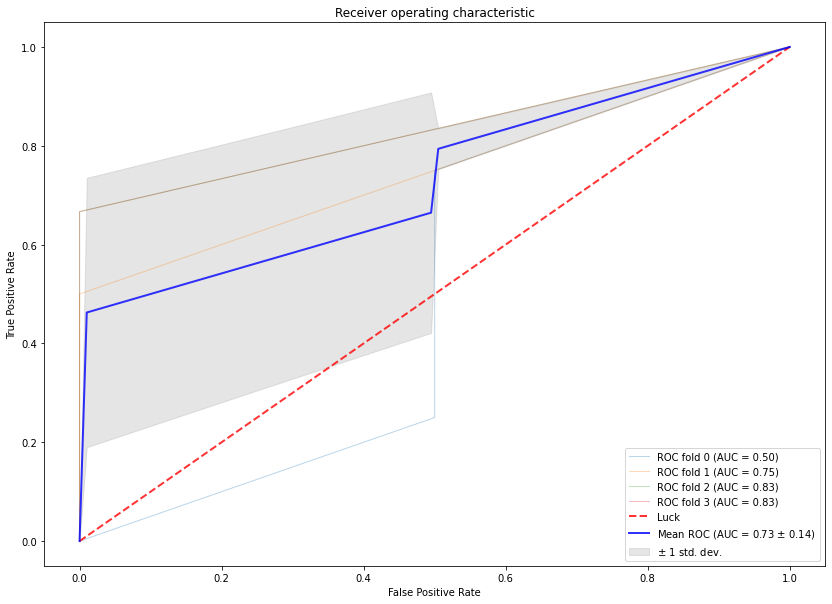

(<Figure size 1008x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8f44577d0>)

In [38]:
#Naive bayes dfg
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
rf=BernoulliNB()
folds=4
fold_scores=[]
fprs, tprs, scores = [], [], []
skf = StratifiedKFold(n_splits=folds,shuffle=True)
skf.get_n_splits(DFGEmbeddings, DFGtargets)
print(skf)
i=0
folds_score=[]
for train_index, test_index in skf.split(DFGEmbeddings, DFGtargets):
    X_train, X_test = [DFGEmbeddings[i] for i in train_index] ,[DFGEmbeddings[i] for i in test_index]
    y_train, y_test = [DFGtargets[i] for i in train_index] ,[DFGtargets[i] for i in test_index]
    rf.fit(X_train, y_train)
    _, _, auc_score_train = compute_roc_auc(train_index,rf,DFGEmbeddings,DFGtargets)
    fpr, tpr, auc_score = compute_roc_auc(test_index,rf,DFGEmbeddings,DFGtargets)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    y_pred=rf.predict(X_test)
    print(f"Score for fold {i} :", accuracy_score(y_pred,y_test))
    folds_score.append(accuracy_score(y_pred,y_test))
    i=i+1
print("Accuracy: ",statistics.mean(folds_score))
plot_roc_curve(fprs, tprs)